In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sns.set(rc={'figure.figsize':(12,8)})
pd.options.display.max_rows=None

# Data Preprocessing Train Data

In [107]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
def transform_age(dataset):
    if not math.isnan(dataset.Age):
        return dataset.Age
    if dataset.Pclass == 1:
        if dataset.Sex == 'male':
            return 40
        else:
            return 35
    elif dataset.Pclass == 2:
        if dataset.Sex == 'male':
            return 30
        else:
            return 28
    else:
        if dataset.Sex == 'male':
            return 24
        else:
            return 22
            
    
def extract_cabin(cabin):
    if cabin == cabin:
        return cabin.split()[0][0]
    else:
        return cabin    
    
def get_age_group(age):
    if age <=13:
        return 1
    elif age >13 and age < 37:
        return 2
    elif age >=37 and age <60:
        return 3
    else:
        return 4
    
def process_cabin(data,fornull=True):
    if fornull:
        cabin_data = data[(data['Cabin'].isnull())]
    else:
        cabin_data = data[~(data['Cabin'].isnull())]
    y = cabin_data['Cabin_Codes']
    x = cabin_data[['Age','SibSp','Parch','Fare','Pclass','Sex','Embarked','Age_Group']]
    x.Age = x.apply(transform_age,axis=1)
    
    return x,y,cabin_data

In [109]:
data['Cabin_Codes'] = data['Cabin'].apply(extract_cabin)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


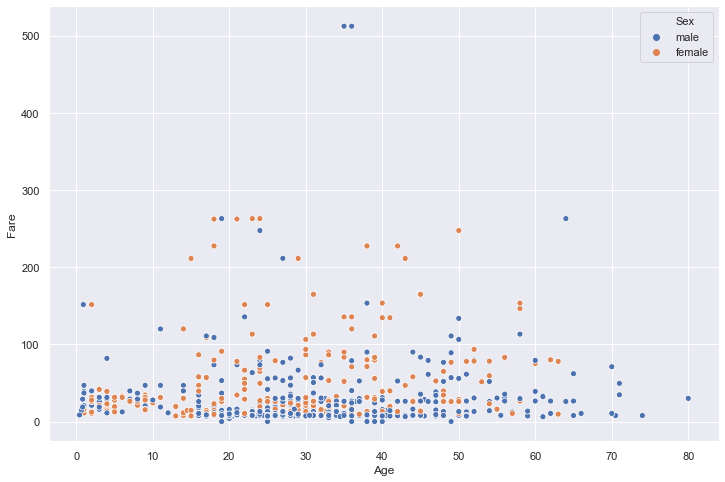

In [110]:
sns.scatterplot(x='Age',y='Fare',data=data,hue='Sex')

In [111]:
data['Age'] = data.apply(transform_age,axis=1)
data['Age_Group'] = data['Age'].apply(get_age_group)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,2


In [112]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_Codes    687
Age_Group        0
dtype: int64

In [113]:
x,y,cabin_data = process_cabin(data,fornull=False)
x = pd.get_dummies(x,columns=['Pclass','Sex','Embarked','Age_Group'],drop_first=True)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [114]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(x[['Fare']])
x['Fare'] = temp[:,0]
x = x.drop(['Age'],axis=1)
x.head()

,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_2,Age_Group_3,Age_Group_4
1,1,0,0.139136,0,0,0,0,0,0,1,0
3,1,0,0.103644,0,0,0,0,1,1,0,0
6,0,0,0.101229,0,0,1,0,1,0,1,0
10,1,1,0.032596,0,1,0,0,1,0,0,0
11,0,0,0.051822,0,0,0,0,1,0,1,0


In [115]:
kmodel = KNeighborsClassifier(n_neighbors=2)
kres = kmodel.fit(x,y)
cabin_data['Predicted'] = kres.predict(x)
acc = (cabin_data[cabin_data.Cabin_Codes == cabin_data.Predicted].count()/cabin_data.shape[0])[0]
print('Accuracy for {} : {}'.format(2,acc))
print(kres.predict(x))

Accuracy for 2 : 0.696078431372549
['C' 'C' 'C' 'G' 'C' 'D' 'A' 'C' 'B' 'D' 'B' 'C' 'B' 'C' 'F' 'F' 'C' 'E'
 'A' 'B' 'D' 'A' 'B' 'D' 'C' 'F' 'B' 'C' 'B' 'D' 'B' 'E' 'B' 'A' 'B' 'F'
 'A' 'F' 'B' 'B' 'E' 'A' 'D' 'C' 'C' 'C' 'C' 'D' 'E' 'C' 'B' 'D' 'A' 'B'
 'B' 'C' 'D' 'A' 'B' 'D' 'C' 'C' 'B' 'D' 'B' 'C' 'C' 'C' 'B' 'C' 'C' 'C'
 'D' 'B' 'C' 'C' 'B' 'B' 'C' 'F' 'C' 'D' 'C' 'E' 'D' 'B' 'B' 'C' 'B' 'D'
 'E' 'C' 'E' 'C' 'C' 'B' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'D' 'A' 'B'
 'C' 'B' 'C' 'D' 'B' 'B' 'B' 'E' 'C' 'F' 'B' 'B' 'C' 'B' 'B' 'B' 'C' 'C'
 'A' 'B' 'C' 'E' 'D' 'C' 'A' 'B' 'B' 'D' 'A' 'C' 'F' 'C' 'B' 'B' 'A' 'B'
 'B' 'C' 'A' 'C' 'A' 'C' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B' 'E' 'E' 'C' 'B'
 'C' 'F' 'B' 'F' 'D' 'B' 'B' 'C' 'C' 'B' 'B' 'D' 'E' 'B' 'B' 'D' 'D' 'F'
 'B' 'B' 'C' 'A' 'D' 'B' 'A' 'C' 'A' 'B' 'E' 'B' 'C' 'B' 'B' 'D' 'B' 'D'
 'A' 'D' 'B' 'B' 'B' 'B']


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
test_data,test_target,cabin_data = process_cabin(data)
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked','Age_Group'],drop_first=True)
#test_data.Age = test_data.Age.apply(get_age_group)
test_data = test_data.drop(['Age'],axis=1)
test_data['Fare'] = scaler.transform(test_data[['Fare']])
cabin_data['Cabin_Codes'] = kres.predict(test_data)
test_data.head()

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_2,Age_Group_3,Age_Group_4
0,1,0,0.014151,0,1,1,0,1,1,0,0
2,0,0,0.015469,0,1,0,0,1,1,0,0
4,0,0,0.015713,0,1,1,0,1,1,0,0
5,0,0,0.016510,0,1,1,1,0,1,0,0
7,3,1,0.041136,0,1,1,0,1,0,0,0


In [117]:
data['Cabin_Codes'] = data['Cabin_Codes'].fillna(cabin_data['Cabin_Codes'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,E,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,E,2


In [118]:
data.to_csv('train_1.csv',index=False)

# Data Processing test

In [119]:
t_data = pd.read_csv('test.csv')
test_data = t_data.copy()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [120]:
test_data.Age = test_data.apply(transform_age,axis=1)
test_data['Fare'] = test_data['Fare'].fillna(method='ffill')
test_data['Cabin_Codes'] = test_data['Cabin'].apply(extract_cabin)
test_data['Age_Group'] = test_data['Age'].apply(get_age_group)
print(test_data.isnull().sum())
print(test_data.head())

passenger_id = test_data.PassengerId

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Cabin_Codes    327
Age_Group        0
dtype: int64
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Cabin_Codes  Age_Group  
0  34.5      0      0   330911   7.8292   NaN        Q         NaN          2  
1  47.0      1      0   363272   7.0000   NaN        S         NaN          3  
2  62.0      0     

In [121]:
final_data,temp1,temp2 = process_cabin(test_data,fornull=True)
final_data.head()

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Age_Group
0,34.5,0,0,7.8292,3,male,Q,2
1,47.0,1,0,7.0000,3,female,S,3
2,62.0,0,0,9.6875,2,male,Q,4
3,27.0,0,0,8.6625,3,male,S,2
4,22.0,1,1,12.2875,3,female,S,2


In [122]:
final_data = pd.get_dummies(final_data,columns=['Pclass','Sex','Embarked','Age_Group'],drop_first=True)
final_data = final_data.drop(['Age'],axis=1)

In [123]:
temp2['Codes'] = kres.predict(final_data)
test_data['Cabin_Codes'] = test_data['Cabin_Codes'].fillna(temp2['Codes'])
test_data

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes,Age_Group
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q,B,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S,B,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q,B,4
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S,B,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S,B,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S,B,2
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q,B,2
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S,B,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C,B,2
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S,B,2


In [124]:
test_data.to_csv('test_1.csv',index=False)